<center><h1 style="font-family:algerian;font-size:50px"> TP7: Navie Bayes Classification and Bayes Optimization algorithm </h1></center>

<hr style="border:2px solid black">

<fieldset><legend><h1>les objectifs :</h1></legend>
<ol>
<li>Comprendre les fondements théoriques de la méthode Naive Bayes.</li>
<li>Apprendre comment utiliser Naive Bayes pour résoudre des problèmes de classification, tels que la classification de texte.</li>
<li>Découvrir comment utiliser l'optimisation bayésienne pour ajuster les hyperparamètres des modèles de machine learning, ce qui peut améliorer leur précision.</li>
<li>Faire des exercices pratiques pour mettre en pratique les concepts appris et renforcer la compréhension de Naive Bayes et de l'optimisation bayésienne.</li>
</ol></fieldset>

<fieldset><legend><h1>Rappel: théorème de bayes</h1></legend>

La méthode de classification naïve bayésienne est un algorithme d'apprentissage supervisé (supervised machine learning) qui permet de classifier un ensemble d'observations selon des règles déterminées par l'algorithme lui-même. Cet outil de classification doit dans un premier temps être entrainé sur un jeu de données d'apprentissage qui montre la classe attendue en fonction des entrées. Pendant la phase d'apprentissage, l'algorithme élabore ses règles de classification sur ce jeu de donnée, pour les appliquer dans un second temps à la classification d'un jeu de données de prédiction. Le classificateur bayésien naïf implique que les classes du jeu de données d'apprentissage soit connu et fournit, d'où le caractère supervisé de l'outil.

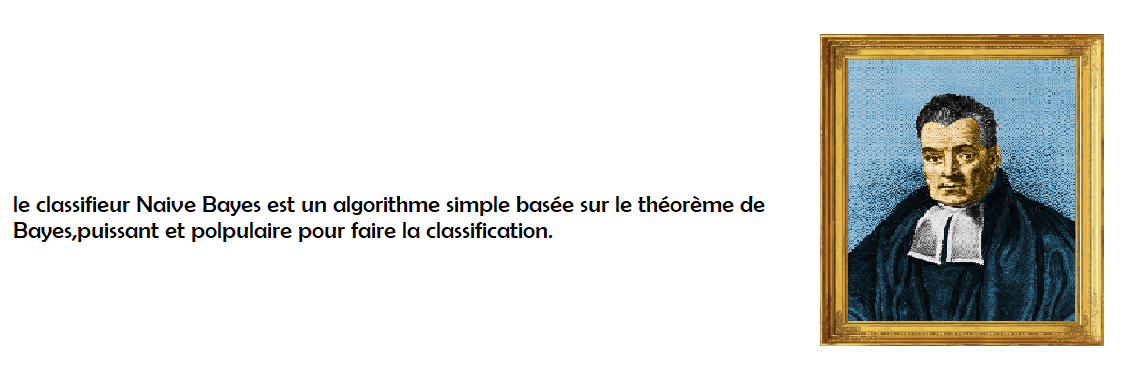

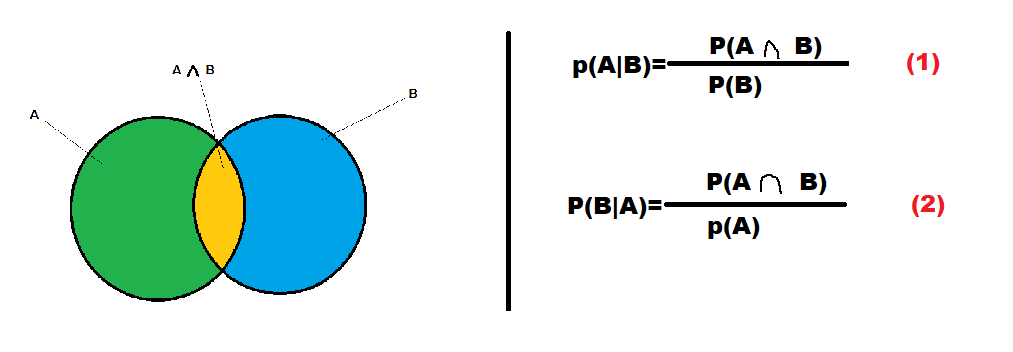

À partir des deux équations en peut déduire

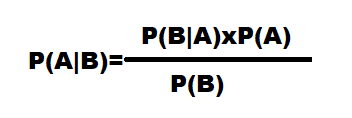

<fieldset><legend><h1> Naive Bayes : Les types d'algorithmes</h1> </legend></fieldset>

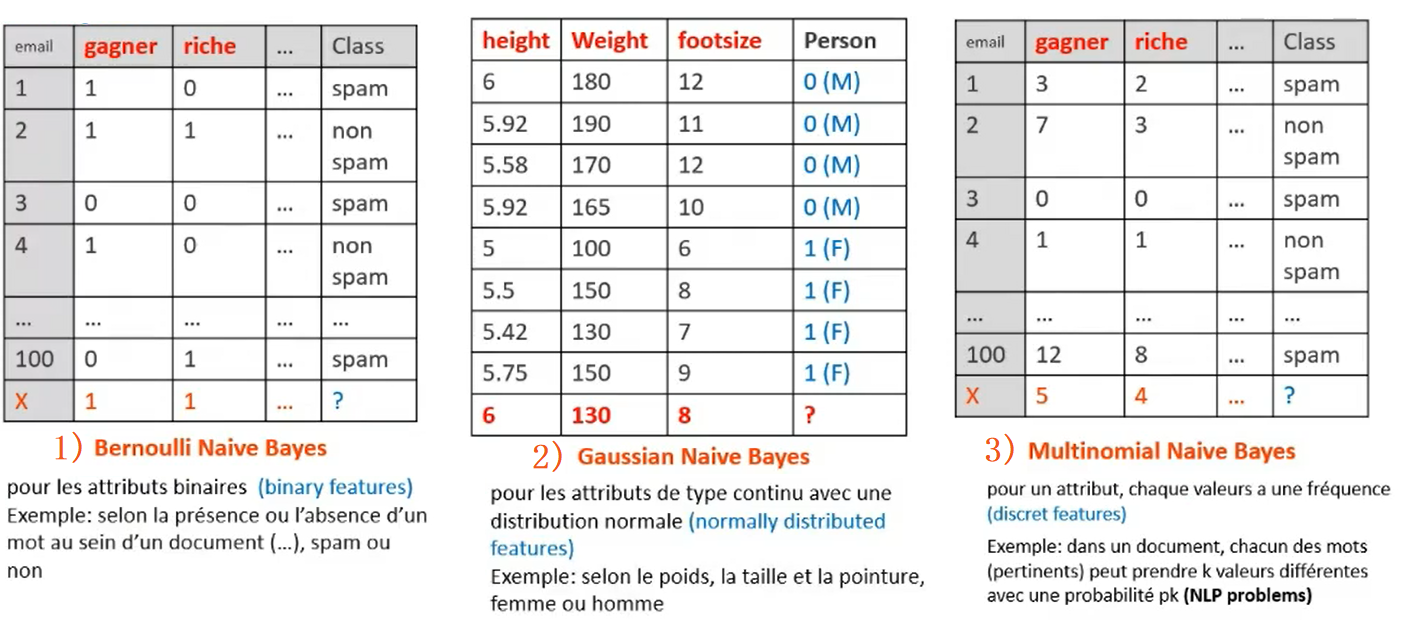

<fieldset><legend><h1> Exemple pratique :</h1> </legend></fieldset>

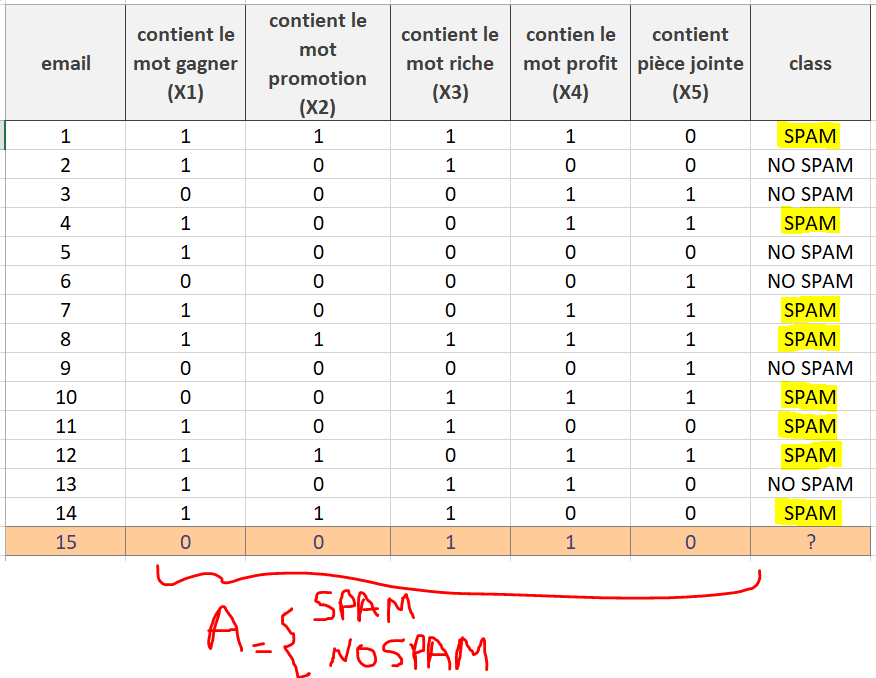

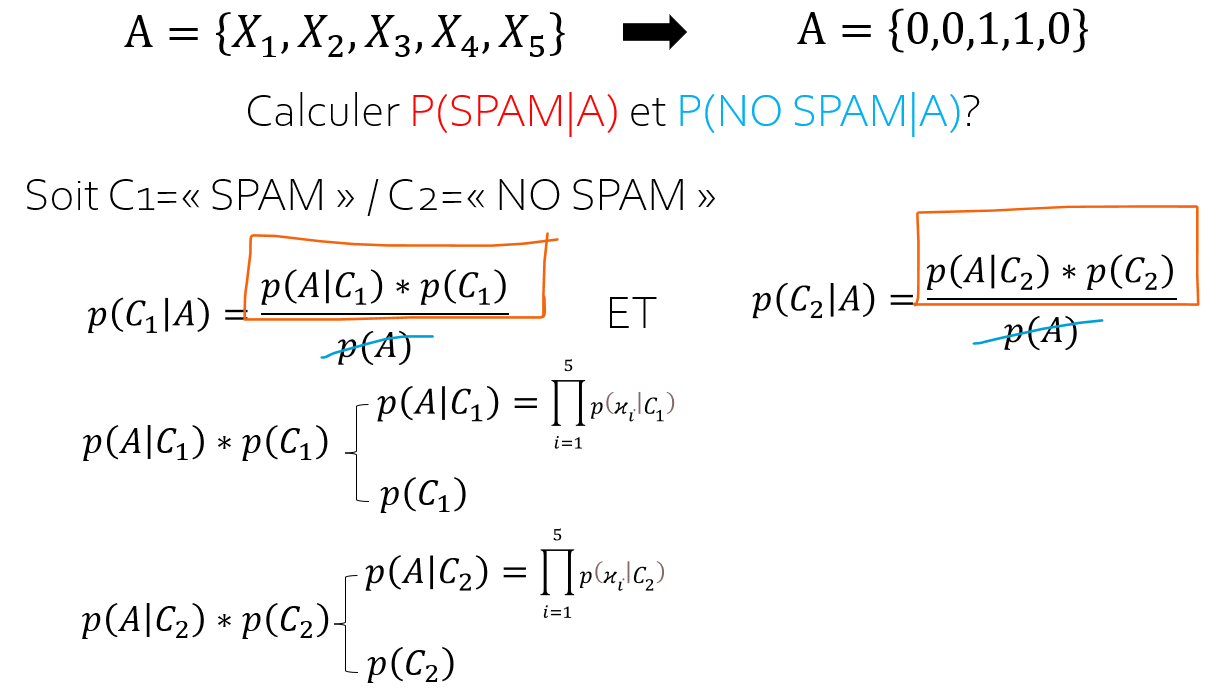

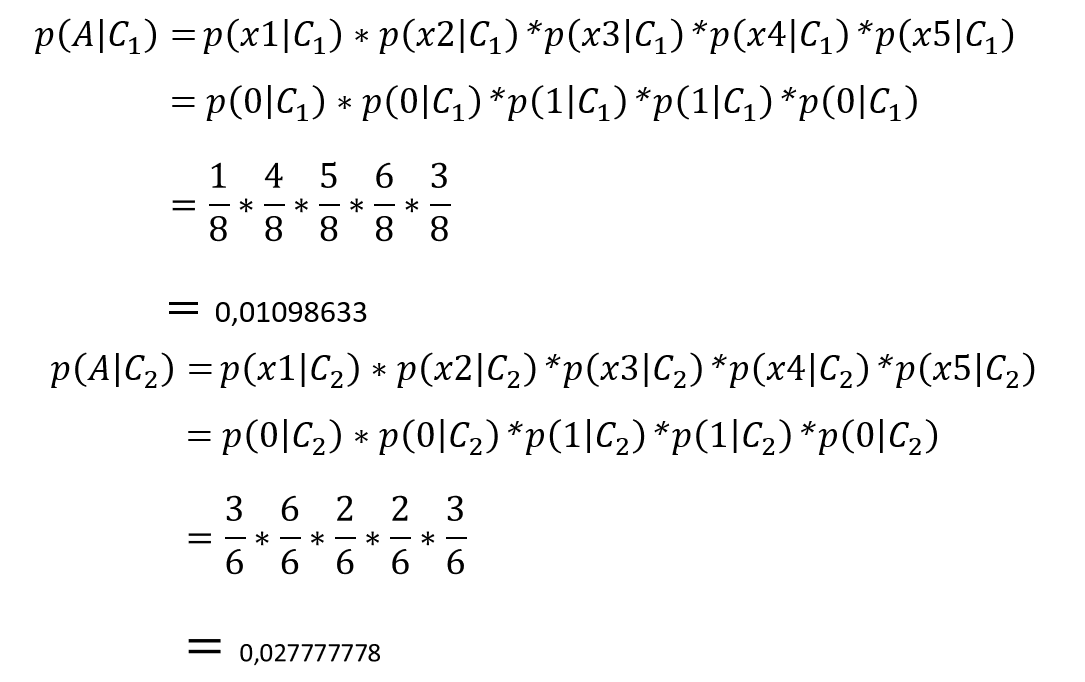

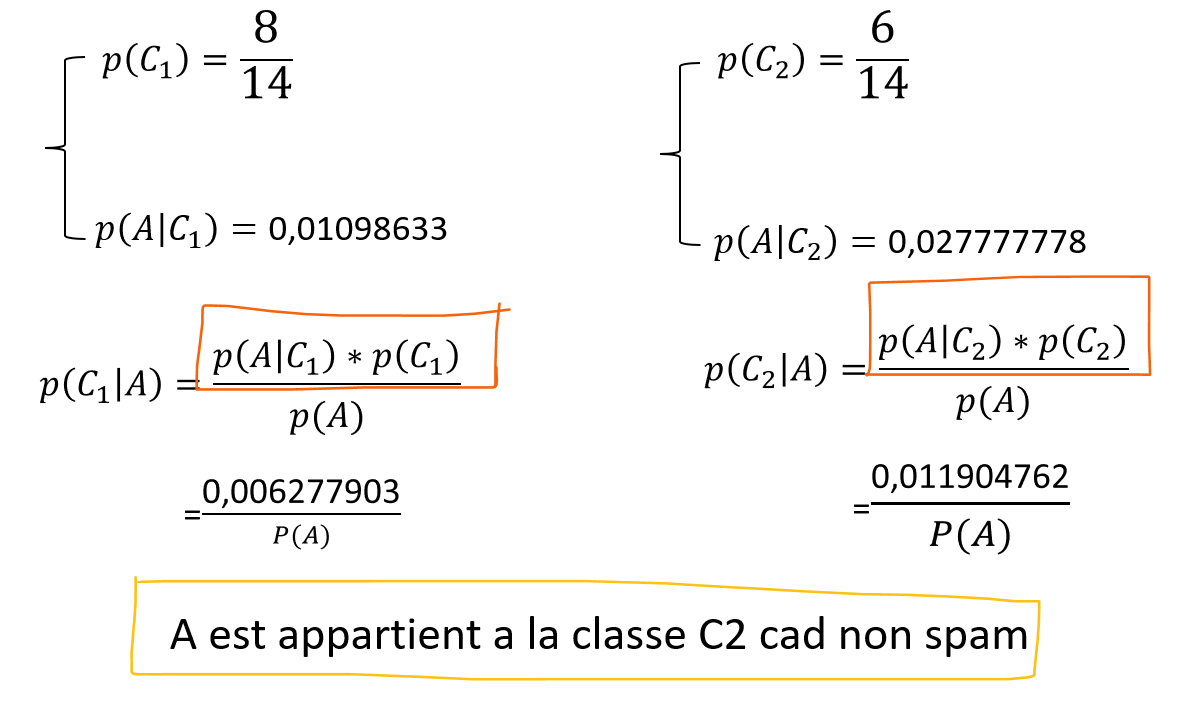

<fieldset><legend><h1> les avantages</h1> </legend></fieldset>

    1-le Naive Bayes Classifier est très rapide pour la classification.
    2-La classification est possible même avec un petit jeu de données.

<fieldset><legend><h1> les inconvénients</h1> </legend></fieldset>

    1-l’algorithme Naive Bayes Classifier suppose l’indépendance des variables : C’est une hypothèse forte et qui est violée dans la majorité des cas réels.

# I-La classification naïve bayésienne

In [1]:
import numpy as np 
import pandas as pd 
data = pd.read_csv("C:/Users/lenovo/TP7/spam.csv", encoding = "latin-1")
data.head()

,class,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,no_spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,no_spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,no_spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,no_spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
data.isnull().sum()

class            0
sms              0
Unnamed: 2    5387
Unnamed: 3    5423
Unnamed: 4    5429
dtype: int64

In [3]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
data.head()

,class,sms
0,no_spam,"Go until jurong point, crazy.. Available only ..."
1,no_spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,no_spam,U dun say so early hor... U c already then say...
4,no_spam,"Nah I don't think he goes to usf, he lives aro..."


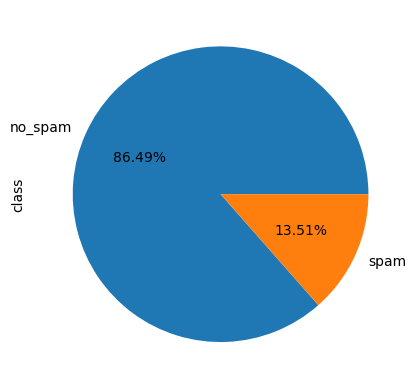

In [4]:
import matplotlib.pyplot as plt
count =pd.value_counts(data["class"], sort= True)
count.plot(kind = 'pie',autopct='%1.2f%%') 
plt.show()

In [5]:
data.groupby('class').describe()

sms                                                               
        count unique                                                top freq
class                                                                       
no_spam  4701   4403                             Sorry, I'll call later   30
spam      734    642  Please call our customer service representativ...    4

<fieldset><legend><h1> 1-Traitement du texte </h1> </legend></fieldset>

https://docs.python.org/3/library/re.html et https://docs.python.org/3/library/nltk.html 

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#une fonction pour nettoyer les messages 
def nettoyage_sms(message):
    message = re.sub("[^A-Za-z]", " ", message) #1 pour prise en considération les lettres majuscule et minuscule de  a à z
                                                # https://docs.python.org/3/library/re.html
    message = message.lower() #2 mettre les lettres en miniscule
    message = message.split() #3 séparer les mots
    stemmer = PorterStemmer()   #4 trouver la racine signifiant mot de chaque mot        
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] #5 Les mots vides sont les mots anglais qui n’ajoutent pas beaucoup de sens à une phrase.
    message = " ".join(message) #6 Garder les mots nettoyés ensemble
    return message


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#nettoyer les SMS de notre jeu de données
messages = []
for i in range(0, len(data)):
    message = nettoyage_sms(data.sms[i])
    messages.append(message)
    
data = data.drop(["sms"],axis=1)
data['sms'] = messages
data.head()

,class,sms
0,no_spam,go jurong point crazi avail bugi n great world...
1,no_spam,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,no_spam,u dun say earli hor u c alreadi say
4,no_spam,nah think goe usf live around though


In [10]:
#teste : message original 
print("England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+")

England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+


In [11]:
#teste n1 : message nettoyé
sms_net=nettoyage_sms("England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+")
print(sms_net)

england v macedonia dont miss goal team news txt ur nation team eg england tri wale scotland txt poboxox w wq


<hr style="border:2px solid black">

<fieldset><legend><h1> 2-Vectorisation du texte </h1> </legend></fieldset>

In [14]:
y = data["class"].values
x = data["sms"].values

In [15]:
from sklearn.model_selection import train_test_split
#question 1: répartir les données  : 80 % de données d'entraînement et 20 % de données de test
xtrain , xtest , ytrain , ytest =  train_test_split(x,y,test_size=0.2,randam_stat=1)

# 2-1:Count Vectorizer

Scikit-learn est utilisé pour convertir une collection de documents texte en un vecteur de nombre de termes/jetons. Il permet également le prétraitement des données textuelles avant de générer la représentation vectorielle. Cette fonctionnalité en fait un module de représentation de fonctionnalités très flexible pour le texte.CountVectorizer

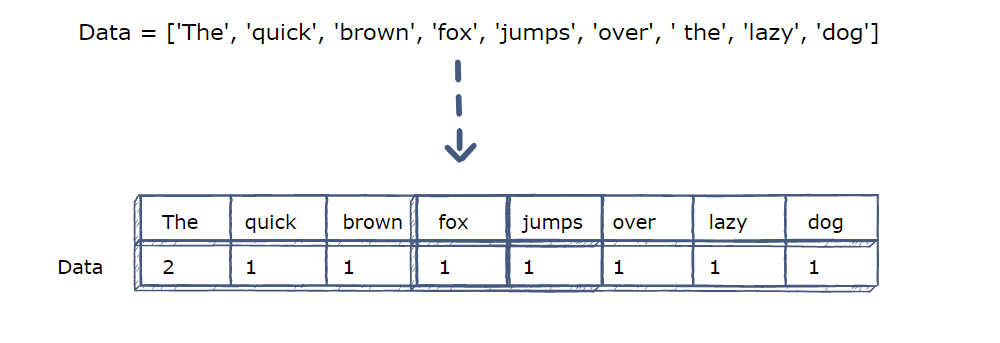

https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer(stop_words='english',max_df=0.5)
# ajuster les données d'entrainement puis les transformer en matrice
x_train = vect1.fit_transform(xtrain)
# transformer les données de test en matrice 
x_test = vect1.transform(xtest)

<fieldset><legend><h1> 3-Création du model Naive Bayes </h1> </legend></fieldset>

In [ ]:
# importation de l'algorithme de naive bayes 
#le model Bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
#le model Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
# le model multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
#question 2: Définir un modèl de classification à l'aide des trois modèles de classification
clf1 = MultinomialNB()

In [ ]:
#question 3: Entraîner le model
clf1.fit(x_train,y_train)

In [ ]:
#question 4 : Predire le modèl pour les données de test 
y_pred_test = clf1.predict(x_test)

In [ ]:
#question 5: afficher accuracy du model 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test))

In [ ]:
#question 6: afficher matrice de confusion du model
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred_test)
print(cm)

In [16]:
new_text = pd.Series('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. valid 12 hours')
new_text_transform = vect1.transform(new_text)
print(" The email is a" ,clf1.predict(new_text_transform))

 The email is a ['spam']


In [17]:
new_text = pd.Series(" Hello, how are you?")
new_text_transform = vect1.transform(new_text)
print(" The email is a" ,clf1.predict(new_text_transform))

 The email is a ['no_spam']


<fieldset><legend><h1>II- Optimisation Bayésienne</h1> </legend></fieldset>

L’objectif est d’utiliser un petit nombre d’observations pour estimer un comportement plus global. En exploitant efficacement la connaissance accumulée sur notre fonction boîte noire, on espère minimiser le nombre d’observations et converger rapidement vers la configuration optimale.

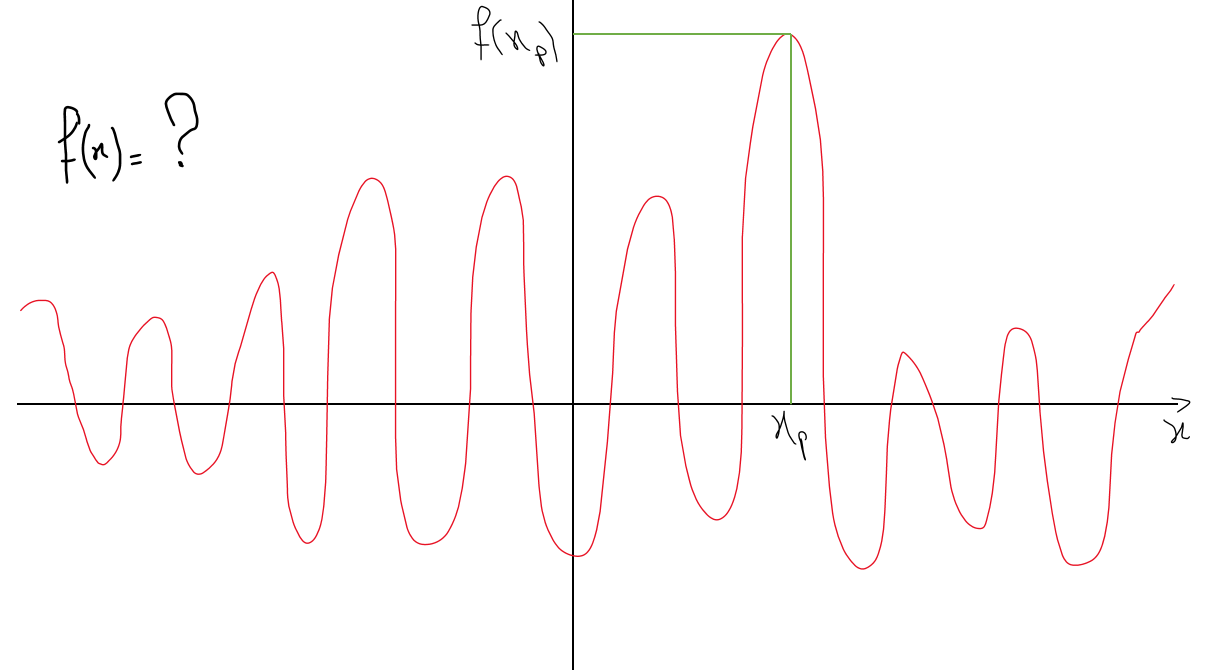

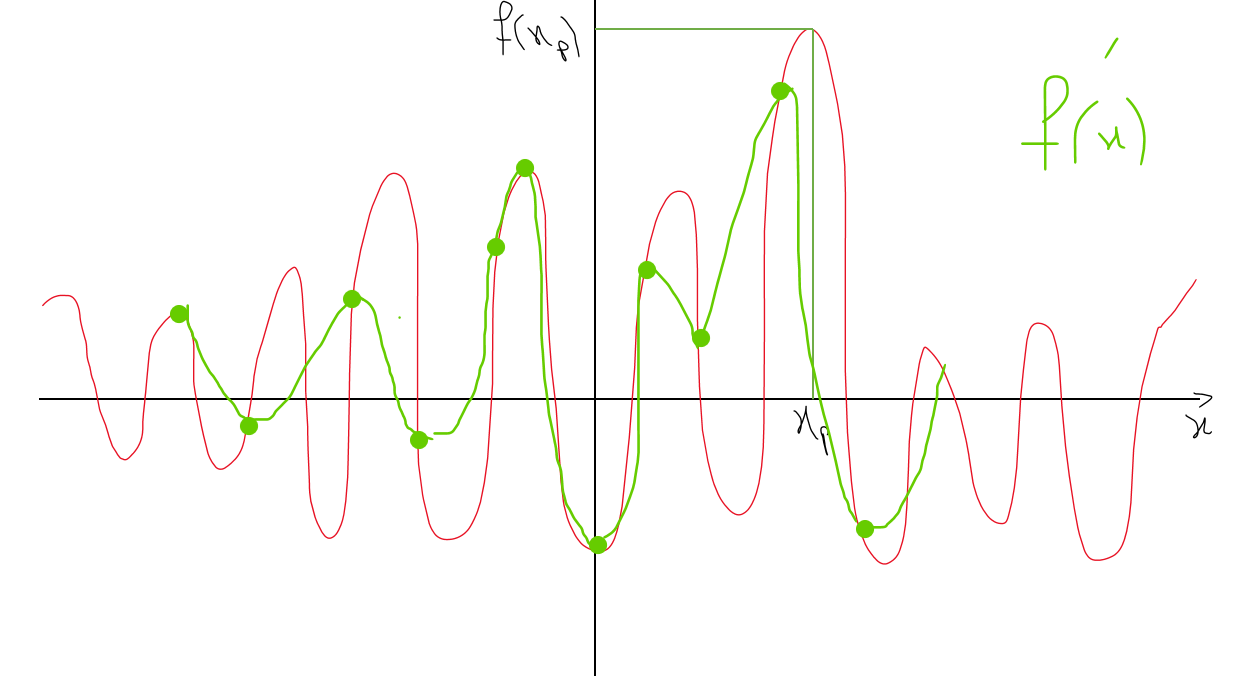

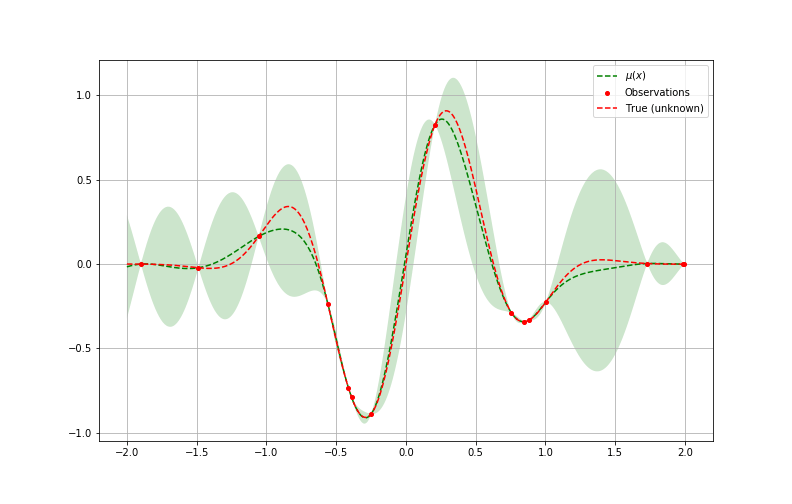

<fieldset><legend><h1>1-Random-Forest</h1> </legend></fieldset>

In [55]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data=pd.read_csv("exemple1.csv")

In [56]:
features=['age','sex','region','income','married','children','car','save_act','current_act','mortgage']
X=data[features]
Y=data["pep"]

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
#question 7 : Définir un modèle de classification à l'aide de la classe Random Forest Classifier (n_estimators=200)
clf = RandomForestClassifier(n_estimators=200)
#question 8 : Entraîner le model
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [91]:
y_pred = clf.predict(X_test)
#question 9 :  afficher accuracy du model 
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.8333333333333334


<fieldset><legend><h1>2-Optemisation Byesienne du Random-Forest</h1> </legend></fieldset>

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Integer, Real

# question 10 : Définir les hyperparamètres à optimiser [10,500] pour n_estimators
# [2,50] pour max_depth
space = [Integer(10,500,name="n_estimators"),Integer(2,50,name="max_depth")]

# Définir la fonction objectif à optimiser
def objective(params):
    n_estimators, max_depth = params
#question 11 : Définir le modèle de classification à optimiser (random_state=fix)
    clf = RandomForestClassifier(n_estimators,max_depth)
#question 12 : Entraîner le model
    clf.fit(x_train,y_train)
    y_pred = clf.predict(X_test)
#question 13 :  calculer accuracy du model 
    accuracy = clf.score(X_test,Y_test)
    return accuracy

# Optimiser les hyperparamètres en utilisant l'algorithme d'optimisation bayésienne 
#question 14 : fonction gp_minimize(fonction objectif,les hyperparametres a optimiser,n_call=nombre d'appel de la fonction(50) )
result = gp_minimize(objective,space,n_call=60)
#Afficher les résultats
print("Optimum trouvé: ", result.fun)
print("Hyperparamètres optimaux: ", result.x)


C:\Users\lenovo\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Optimum trouvé:  0.8666666666666667
Hyperparamètres optimaux:  [126, 17]
